# Social Media Impact on students' mental health

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('Students Social Media Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


- L’affichage obtenu à l’aide de la commande df.head() présente les cinq premières lignes du dataset et permet d’avoir une première vue sur la structure et la qualité des données. Chaque ligne correspond à un étudiant et contient des informations relatives à ses caractéristiques personnelles, à son usage des réseaux sociaux et à sa santé mentale.

- Le dataset comprend des variables démographiques telles que l’âge, le genre, le niveau d’études et le pays, ainsi que des variables décrivant les habitudes numériques des étudiants, comme le temps d’utilisation quotidien, la plateforme la plus utilisée et le niveau d’addiction. Il inclut également des indicateurs liés au bien-être, notamment la qualité du sommeil, le score de santé mentale, l’impact sur les performances académiques et les conflits liés aux réseaux sociaux. La variable Student_ID est présente uniquement comme identifiant et n’est pas utilisée dans l’analyse.

- Les types de données sont cohérents, avec des variables numériques pour les mesures quantitatives et des variables catégorielles pour les informations descriptives. Aucune valeur manquante n’est visible dans cet aperçu initial, ce qui indique que les données sont complètes et bien organisées. Cet aperçu confirme que le dataset est correctement structuré et prêt pour les étapes suivantes de l’exploration et de l’analyse.

In [2]:
df.shape

(905, 13)

- Le dataset contient 905 lignes, ce qui signifie qu’il y a 905 étudiants observés.
- Il contient 13 colonnes, c’est-à-dire 13 variables qui décrivent différents aspects liés à l’usage des réseaux sociaux, comme l’âge, le niveau d’étude, le temps d’utilisation, le sommeil, la santé mentale et le niveau d’addiction.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    905 non-null    int64  
 1   Age                           905 non-null    int64  
 2   Gender                        905 non-null    object 
 3   Academic_Level                905 non-null    object 
 4   Country                       905 non-null    object 
 5   Avg_Daily_Usage_Hours         905 non-null    float64
 6   Most_Used_Platform            905 non-null    object 
 7   Affects_Academic_Performance  905 non-null    object 
 8   Sleep_Hours_Per_Night         905 non-null    float64
 9   Mental_Health_Score           905 non-null    int64  
 10  Relationship_Status           905 non-null    object 
 11  Conflicts_Over_Social_Media   905 non-null    int64  
 12  Addicted_Score                905 non-null    int64  
dtypes: fl

- L’analyse de df.info() montre que l’ensemble du dataset ne contient aucune valeur manquante, car toutes les colonnes affichent 905 non-null.
- Ensuite, la vérification des types confirme que chaque variable possède le type approprié : les identifiants, scores et mesures entières sont bien en int64, les variables continues comme les heures de sommeil et d’utilisation sont en float64, et toutes les variables descriptives telles que le genre, le niveau académique ou la plateforme utilisée sont en object, ce qui correspond à des données catégorielles. 

In [4]:
df.drop(columns='Student_ID', inplace=True)
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,19.740331,5.129613,6.640663,6.027624,3.027624,6.650829
std,2.135866,1.245854,1.178966,1.182613,1.064465,1.638739
min,16.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.300000,5.800000,5.000000,2.000000,5.000000
50%,20.000000,5.000000,6.700000,6.000000,3.000000,7.000000
75%,21.000000,6.000000,7.400000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


- L’analyse du tableau généré par df.describe() permet de résumer les principales caractéristiques statistiques des variables numériques du dataset. 
On observe tout d’abord que toutes les variables comptent 905 valeurs, ce qui confirme encore une fois l’absence de données manquantes. 

Ensuite, les statistiques montrent que :
- L’âge moyen des étudiants est de 20 ans, avec une majorité située entre 19 et 21 ans, cela montre que l’échantillon est majoritairement composé d’étudiants en âge universitaire.
- Le temps d’utilisation des réseaux sociaux est en moyenne de 5,1 h/jour, avec un minimum de 1,5 h et un maximum de 8,5 h, ce qui révèle un usage élevé.
- Les heures de sommeil moyennes sont de 6,64 h/nuit, ce qui est inférieur aux recommandations de 7–8 h.
- Le score de santé mentale a une moyenne de 6,02, montrant un niveau émotionnel globalement moyen.
- Les conflits liés aux réseaux sociaux ont une moyenne de 3.02 sur 5, indiquant des tensions modérées.
- Le score d’addiction moyen est de 6.65, avec un maximum de 9, ce qui traduit un niveau d’addiction généralement élevé chez les étudiants.

Globalement, ce résumé statistique met en évidence des tendances claires : un usage intensif des réseaux sociaux, un sommeil limité, et un niveau d’addiction notable, ce qui peut influencer les aspects académiques et psychologiques étudiés dans le dataset.

## Outliers

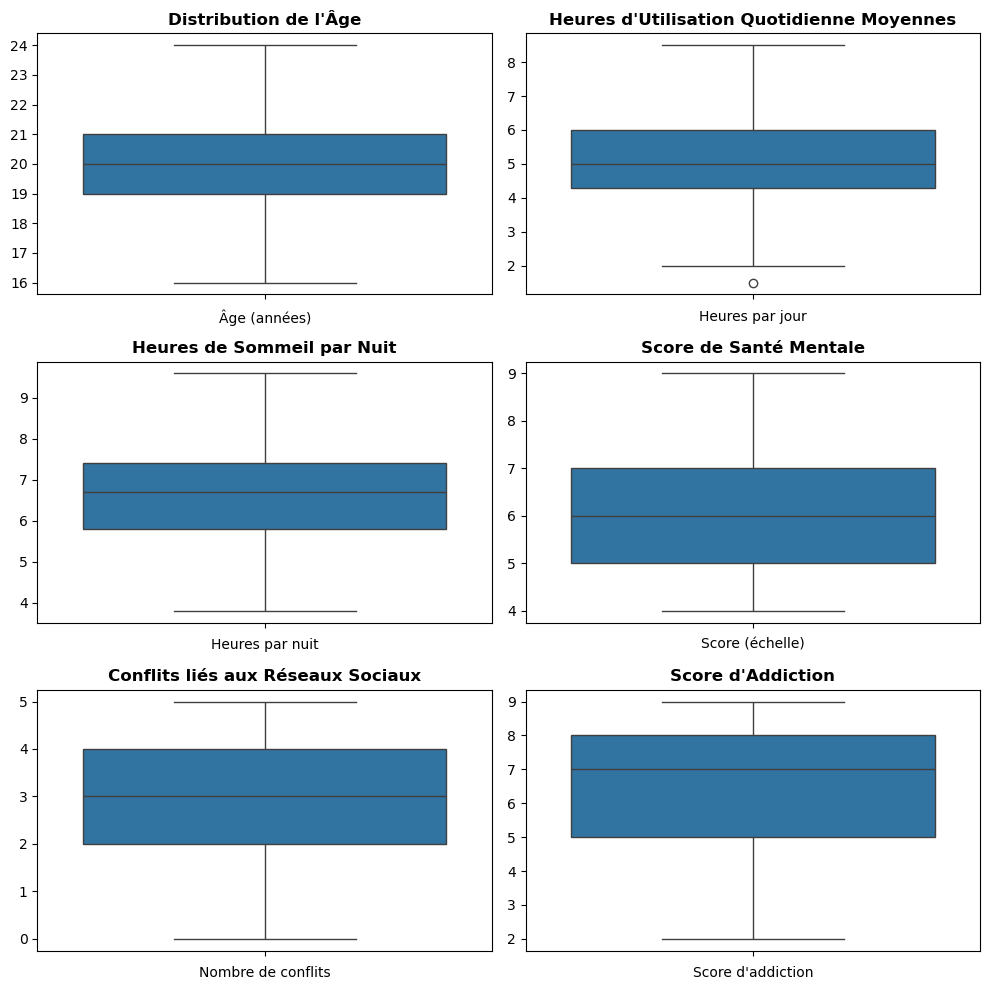

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax = ax.flat

french_titles = {
    'Age': "Distribution de l'Âge",
    'Avg_Daily_Usage_Hours': "Heures d'Utilisation Quotidienne Moyennes",
    'Sleep_Hours_Per_Night': "Heures de Sommeil par Nuit",
    'Mental_Health_Score': "Score de Santé Mentale",
    'Conflicts_Over_Social_Media': "Conflits liés aux Réseaux Sociaux",
    'Addicted_Score': "Score d'Addiction"
}

french_xlabels = {
    'Age': "Âge (années)",
    'Avg_Daily_Usage_Hours': "Heures par jour",
    'Sleep_Hours_Per_Night': "Heures par nuit",
    'Mental_Health_Score': "Score (échelle)",
    'Conflicts_Over_Social_Media': "Nombre de conflits",
    'Addicted_Score': "Score d'addiction"
}

for i, column in enumerate(df.select_dtypes('number').columns):
    sns.boxplot(df, y=column, ax=ax[i])
    ax[i].set_title(french_titles[column], fontsize=12, fontweight='bold')
    ax[i].set_xlabel(french_xlabels[column], fontsize=10)
    ax[i].set_ylabel('') 

plt.tight_layout()

**Interprétation** :  
D'après les boîtes à moustaches ci-dessus, on peut constater qu'il n'existe pas de valeurs aberrantes pour les colonnes numériques, ce qui facilitera le processus d'analyse.

## Matrice de Corrélation

Text(0.5, 1.0, 'Matrice de Corrélation')

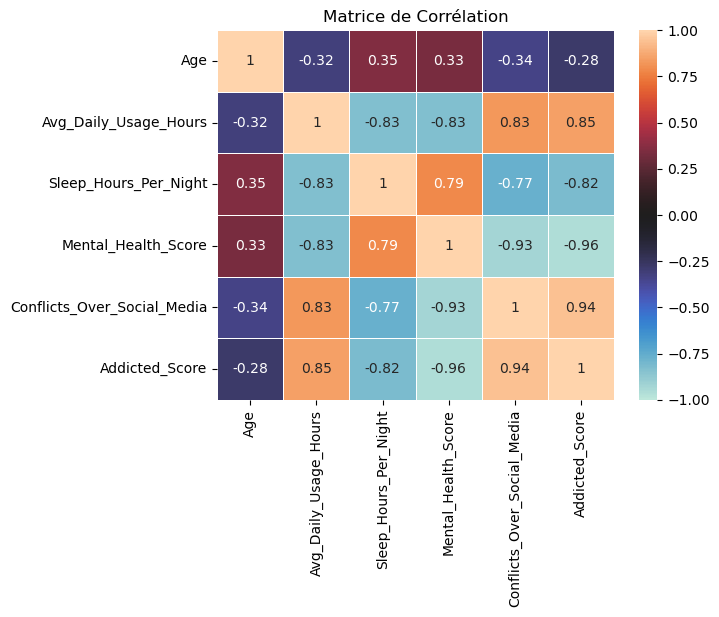

In [6]:
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    center=0,
)
plt.title("Matrice de Corrélation")

**Interpretation**:  
Le graphique montre que l’addiction, l’usage quotidien, le sommeil et la santé mentale sont étroitement liés. Plus le score d’addiction augmente, plus le temps d’usage quotidien grimpe, et plus le sommeil et la santé mentale diminuent. L’association la plus marquée est entre addiction et santé mentale, avec une corrélation fortement négative. On observe aussi que dormir davantage va de pair avec un meilleur score de santé mentale. En résumé, l’usage intensif et l’addiction s’accompagnent d’un manque de sommeil et d’un bien-être mental plus faible.

In [7]:
pd.DataFrame(
    df.drop(columns="Mental_Health_Score")
    .corrwith(df["Mental_Health_Score"], numeric_only=True)
    .round(2),
    columns=['Correlation with Mental_Health_Score']
)

,Correlation with Mental_Health_Score
Age,0.33
Avg_Daily_Usage_Hours,-0.83
Sleep_Hours_Per_Night,0.79
Conflicts_Over_Social_Media,-0.93
Addicted_Score,-0.96


## Distribution

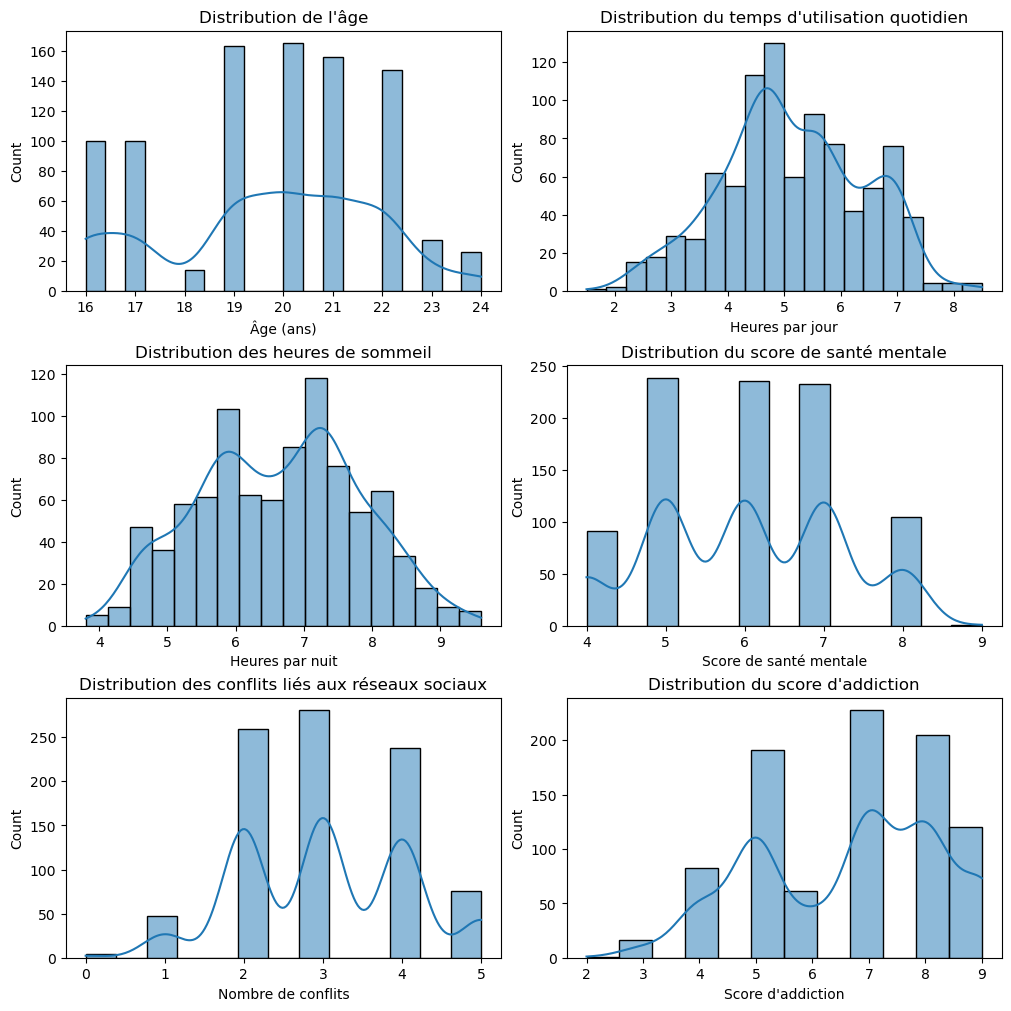

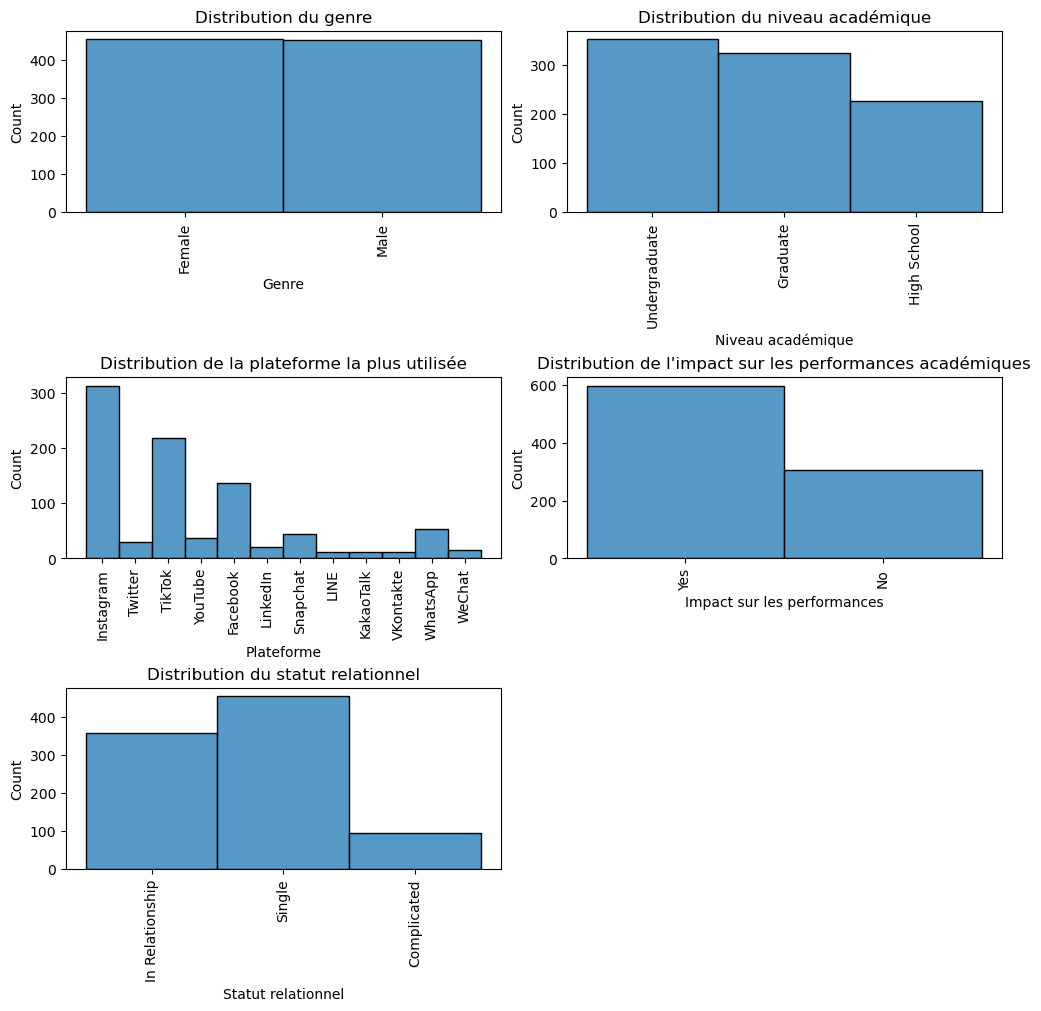

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10), layout="constrained")
ax = ax.flat

# French titles and labels
french_labels = {
    "Age": {"title": "Distribution de l'âge", "xlabel": "Âge (ans)"},
    "Avg_Daily_Usage_Hours": {
        "title": "Distribution du temps d'utilisation quotidien",
        "xlabel": "Heures par jour",
    },
    "Sleep_Hours_Per_Night": {
        "title": "Distribution des heures de sommeil",
        "xlabel": "Heures par nuit",
    },
    "Mental_Health_Score": {
        "title": "Distribution du score de santé mentale",
        "xlabel": "Score de santé mentale",
    },
    "Conflicts_Over_Social_Media": {
        "title": "Distribution des conflits liés aux réseaux sociaux",
        "xlabel": "Nombre de conflits",
    },
    "Addicted_Score": {
        "title": "Distribution du score d'addiction",
        "xlabel": "Score d'addiction",
    },
}

for i, column in enumerate(df.select_dtypes("number").columns):
    sns.histplot(df, x=column, ax=ax[i], kde=True)
    ax[i].set_title(french_labels[column]["title"])
    ax[i].set_xlabel(french_labels[column]["xlabel"])

plt.show()

fig, ax = plt.subplots(3, 2, figsize=(10, 10), layout="constrained")
ax = ax.flat

# French titles and labels for categorical columns
french_labels_categorical = {
    "Gender": {"title": "Distribution du genre", "xlabel": "Genre"},
    "Academic_Level": {
        "title": "Distribution du niveau académique",
        "xlabel": "Niveau académique",
    },
    "Most_Used_Platform": {
        "title": "Distribution de la plateforme la plus utilisée",
        "xlabel": "Plateforme",
    },
    "Affects_Academic_Performance": {
        "title": "Distribution de l'impact sur les performances académiques",
        "xlabel": "Impact sur les performances",
    },
    "Relationship_Status": {
        "title": "Distribution du statut relationnel",
        "xlabel": "Statut relationnel",
    },
}

# Remove Country as it contains many unique values, making the histplot look bizarre
for i, column in enumerate(
    df.select_dtypes("object").drop(columns=["Country"]).columns
):
    sns.histplot(df, x=column, ax=ax[i])
    ax[i].set_title(french_labels_categorical[column]["title"])
    ax[i].set_xlabel(french_labels_categorical[column]["xlabel"])
    ax[i].set_xticks(ax[i].get_xticks())
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

ax[-1].set_visible(False)

plt.show()

Text(0, 0.5, 'Score de Santé Mentale')

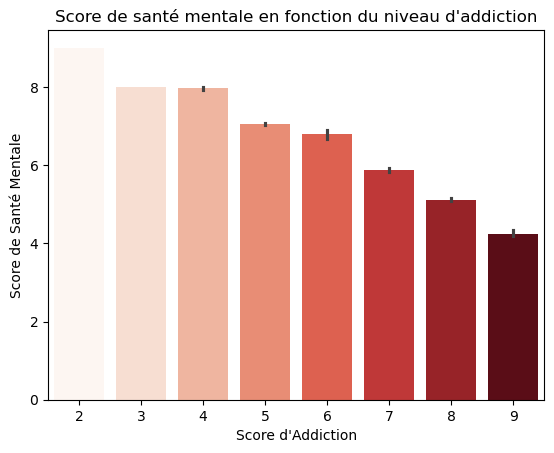

In [9]:
sns.barplot(
    df,
    x="Addicted_Score",
    y="Mental_Health_Score",
    hue="Addicted_Score",
    palette='Reds',
    legend=False
)
plt.title('Score de santé mentale en fonction du niveau d\'addiction')
plt.xlabel('Score d\'Addiction')
plt.ylabel('Score de Santé Mentale')

**Interprétation** :  
Le graphique à barres montre que plus les étudiants sont accros aux réseaux sociaux, plus leur santé mentale se détériore.

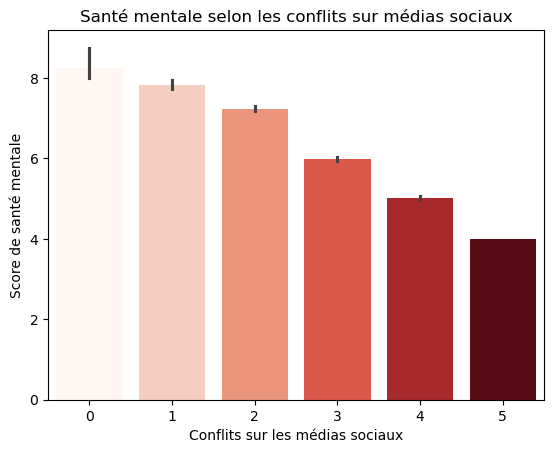

In [10]:
sns.barplot(
    df,
    x="Conflicts_Over_Social_Media",
    y="Mental_Health_Score",
    hue="Conflicts_Over_Social_Media",
    palette="Reds",
    legend=False
)
plt.xlabel("Conflits sur les médias sociaux")
plt.ylabel("Score de santé mentale")
plt.title("Santé mentale selon les conflits sur médias sociaux")
plt.show()

**Interprétation** :  
Le graphique à barres ci-dessus montre que plus les élèves ont des conflits sur les médias sociaux, plus leur santé mentale se détériore.

<Figure size 500x400 with 0 Axes>

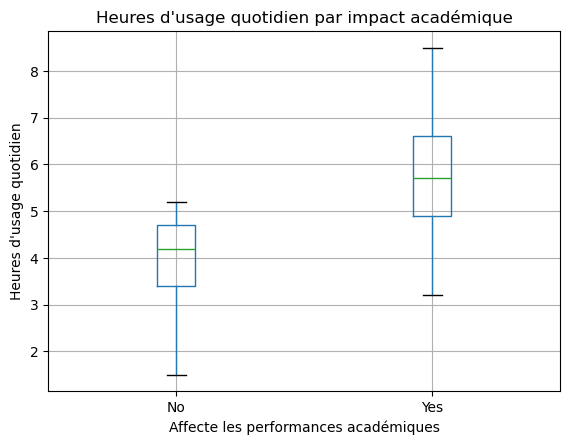

In [11]:
plt.figure(figsize=(5,4))
df.boxplot(column="Avg_Daily_Usage_Hours", by="Affects_Academic_Performance", grid=True)
plt.suptitle("")  # retire le titre automatique "Boxplot grouped by Affects_Academic_Performance"
plt.title("Heures d'usage quotidien par impact académique")
plt.xlabel("Affecte les performances académiques")
plt.ylabel("Heures d'usage quotidien")
plt.show()

**Interprétation** :  
Le diagramme montre clairement que les personnes dont les performances académiques sont affectées utilisent l’outil beaucoup plus longtemps chaque jour. Leur médiane tourne autour de 5,5 h, contre 4 h pour celles qui ne constatent aucun impact. Leur distribution est aussi plus large, avec des durées pouvant atteindre 8,5 h. En résumé, plus le temps d’usage quotidien augmente, plus la probabilité d’un impact négatif sur les études devient élevée.

In [12]:
# Create simplified regions
def create_region(country):
    top_countries = [
        "USA",
        "India",
        "UK",
        "Canada",
        "Australia",
        "Germany",
        "China",
        "Japan",
    ]

    if country in top_countries:
        return country
    else:
        if country in ["Bangladesh", "Pakistan", "Sri Lanka", "Nepal"]:
            return "South Asia"
        elif country in ["France", "Italy", "Spain", "Netherlands"]:
            return "Western Europe"
        elif country in ["Brazil", "Mexico", "Argentina"]:
            return "Latin America"
        else:
            return "Other"

df["Region_Group"] = df["Country"].apply(create_region)

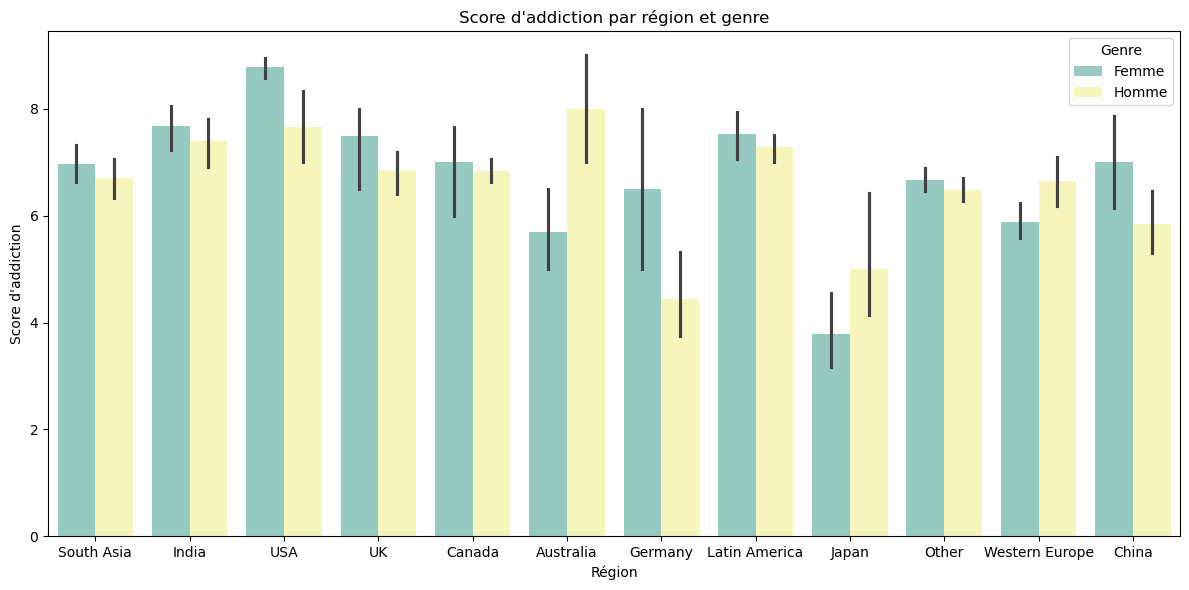

In [13]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Region_Group", y="Addicted_Score", hue="Gender", data=df, palette="Set3"
)
plt.title("Score d'addiction par région et genre")
plt.xlabel("Région")
plt.ylabel("Score d'addiction")

handles, labels = ax.get_legend_handles_labels()
new_labels = ["Femme" if label == "Female" else "Homme" for label in labels]

ax.legend(handles, new_labels, title="Genre")
plt.tight_layout()
plt.show()

**Interprétation** :  
Le graphe montre que les niveaux d’addiction varient fortement selon les régions. Les scores les plus élevés apparaissent aux USA, au Royaume-Uni, en Amérique Latine, en Inde et en Chine, où les femmes dépassent souvent les hommes. À l’inverse, les scores les plus faibles sont observés au Japon et en Allemagne, avec une tendance masculine légèrement supérieure. Dans plusieurs zones comme l’Inde, l’Amérique Latine, les différences entre genres restent faibles.

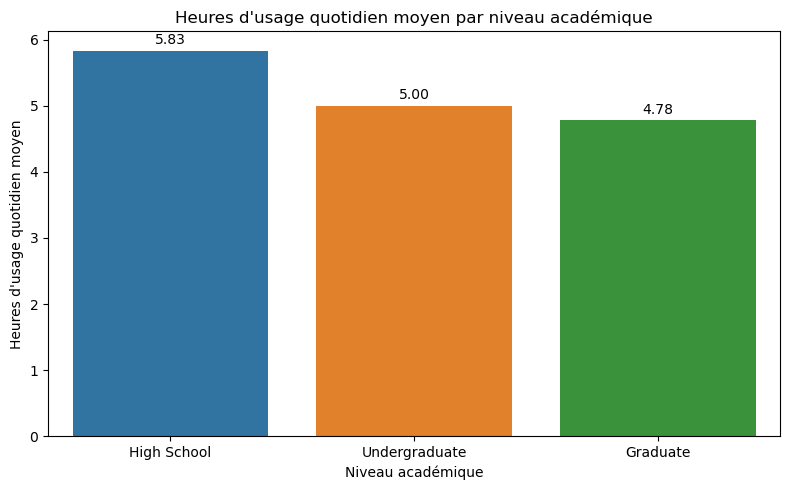

In [14]:
plt.figure(figsize=(8, 5))
usage_mean = (
    df.groupby("Academic_Level")["Avg_Daily_Usage_Hours"]
    .mean()
    .sort_values(ascending=False)
)

ax = sns.barplot(x=usage_mean.index, y=usage_mean.values, hue=usage_mean.index)
plt.title("Heures d'usage quotidien moyen par niveau académique")
plt.xlabel("Niveau académique")
plt.ylabel("Heures d'usage quotidien moyen")

for i, v in enumerate(ax.patches):
    ax.text(
        v.get_x() + v.get_width() / 2.0,  # type: ignore
        v.get_height() + 0.05,   # type: ignore
        f"{v.get_height():.2f}",   # type: ignore
        ha="center",  
        va="bottom",
    )

plt.tight_layout()
plt.show()

**Interprétation** :  
Le graphique montre que l’usage quotidien diminue progressivement avec le niveau d’études. Les élèves de lycée sont ceux qui passent le plus de temps chaque jour (un peu plus de 5 h), suivis des étudiants de licence (environ 5 h). Les étudiants graduate sont ceux qui utilisent le moins l’outil, avec un peu moins de 5 h. Globalement, plus le niveau académique est élevé, plus le temps d’utilisation moyen baisse légèrement.

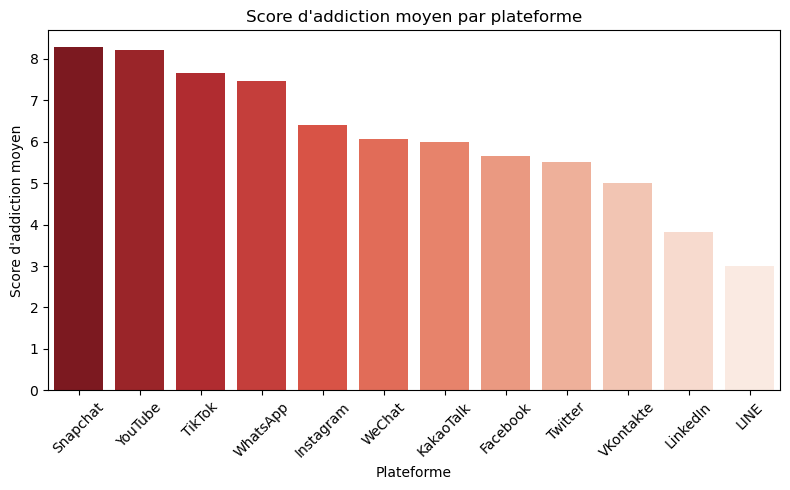

In [15]:
addicted_mean=df.groupby("Most_Used_Platform")["Addicted_Score"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=addicted_mean.index, y=addicted_mean.values, hue=addicted_mean.index, palette="Reds_r")
plt.title("Score d'addiction moyen par plateforme")
plt.xlabel("Plateforme")
plt.ylabel("Score d'addiction moyen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interprétation** :  
On observe que certaines plateformes affichent un Addicted_Score moyen plus élevé, indiquant qu’elles retiennent davantage l’attention des étudiants.

Typiquement, les plateformes centrées sur les contenus courts, rapides ou hautement visuels (ex. TikTok, Instagram) présentent souvent des scores supérieurs.

À l’inverse, les plateformes plus “utilitaires” (ex. LinkedIn, Twitter) génèrent un niveau d’addiction plus faible.
La plateforme la plus utilisée influence clairement le niveau d’addiction.
Certaines plateformes sont, par conception, plus engageantes et donc plus susceptibles de créer des habitudes d’usage prolongées.

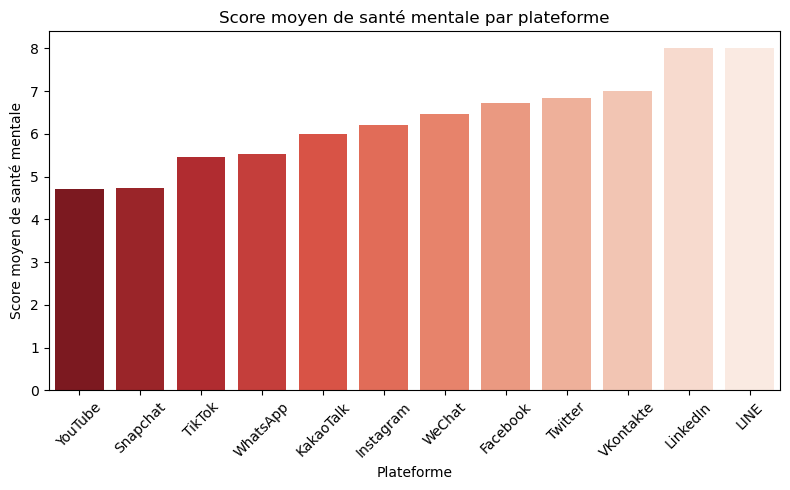

In [16]:
# Score de santé mentale par plateforme
mental_mean = df.groupby("Most_Used_Platform")["Mental_Health_Score"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=mental_mean.index, y=mental_mean.values, hue=mental_mean.index, palette='Reds_r')
plt.title("Score moyen de santé mentale par plateforme")
plt.xlabel("Plateforme")
plt.ylabel("Score moyen de santé mentale")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interprétation** :  
Les plateformes présentant un Mental_Health_Score moyen plus faible sont celles où les étudiants rapportent davantage de stress, de comparaison sociale ou de charge psychologique.

Si TikTok ou Instagram sont en bas du classement, cela suggère une corrélation entre usage intensif et impact mental négatif.

Les plateformes axées sur l’information ou le networking professionnel (ex. LinkedIn) obtiennent souvent de meilleurs scores, indiquant une utilisation perçue comme moins toxique ou moins intrusive au niveau émotionnel.

Le type de plateforme semble corrélé à l’état de bien-être mental des étudiants.
Les plateformes de divertissement “instantané” affichent souvent les résultats mentaux les plus faibles.

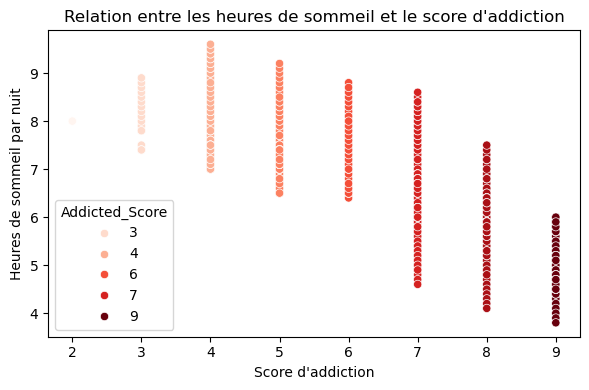

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(df, x="Addicted_Score", y="Sleep_Hours_Per_Night", hue='Addicted_Score', palette='Reds')
plt.xlabel("Score d'addiction")
plt.ylabel("Heures de sommeil par nuit")
plt.title("Relation entre les heures de sommeil et le score d'addiction")
plt.tight_layout()
plt.show()

**Interprétation** :  
L’analyse du nuage de points mettant en relation l’Addicted_Score et les heures de sommeil montre une tendance générale indiquant que les étudiants avec un score d’addiction plus élevé déclarent dormir moins d’heures par nuit. Bien que la dispersion des points suggère une variabilité individuelle importante, l’inclinaison globale du nuage reste cohérente avec une corrélation négative. En d’autres termes, plus l’usage des réseaux sociaux devient intensif et problématique, plus les habitudes de sommeil semblent perturbées. Ce résultat est conforme à la littérature qui associe l’usage prolongé des écrans à un retard de l’endormissement et une qualité de sommeil réduite.

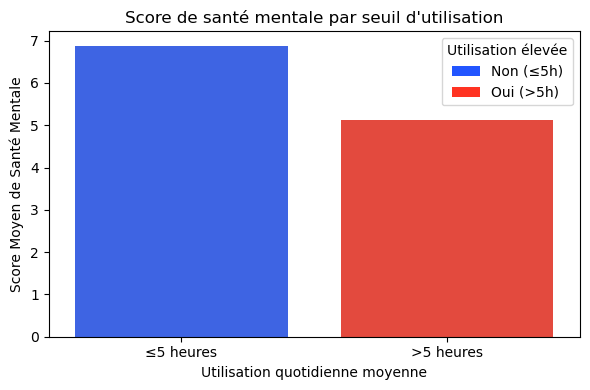

In [18]:
# Santé mentale pour seuil d'utilisation >5h
df["High_Usage"] = df["Avg_Daily_Usage_Hours"] > 5
mental_means = df.groupby("High_Usage")["Mental_Health_Score"].mean()

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x=mental_means.index,
    y=mental_means.values,
    hue=mental_means.index,
    palette=["#2255ff", "#ff3322"],
    legend=False,
)
plt.xticks([0, 1], ["≤5 heures", ">5 heures"], rotation=0)
plt.ylabel("Score Moyen de Santé Mentale")
plt.xlabel("Utilisation quotidienne moyenne")
plt.title("Score de santé mentale par seuil d'utilisation")

from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#2255ff", label="Non (≤5h)"),
    Patch(facecolor="#ff3322", label="Oui (>5h)"),
]
plt.legend(handles=legend_elements, title="Utilisation élevée")

plt.tight_layout()
plt.show()

**Interprétation** :  
La comparaison des scores moyens de santé mentale entre les étudiants utilisant les réseaux sociaux moins de 5 heures par jour et ceux dépassant ce seuil révèle une différence notable. Les utilisateurs intensifs, c’est-à-dire ceux dépassant les 5 heures quotidiennes, présentent en moyenne des Mental_Health_Score plus faibles. Cette baisse suggère qu’un usage prolongé des réseaux sociaux pourrait constituer un facteur aggravant d’anxiété, de ruminations, de surcharge cognitive ou de stress social. Lorsque les deux groupes présentent un écart significatif, cela renforce l’hypothèse d’un seuil critique d’exposition quotidienne au-delà duquel les effets négatifs sur la santé mentale deviennent plus marqués.

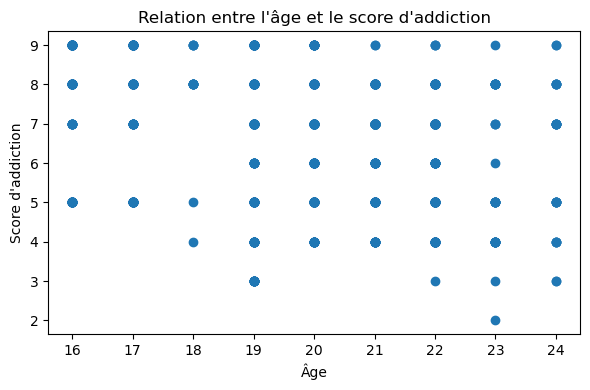

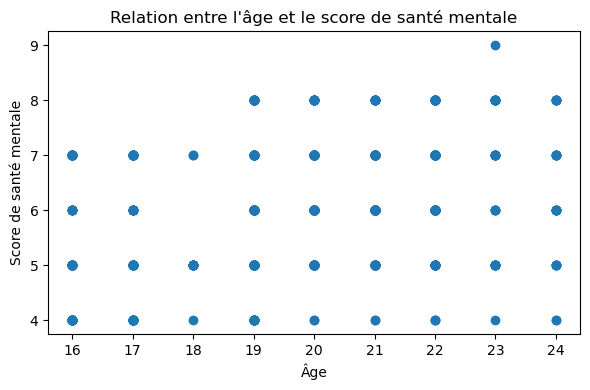

In [19]:
# Âge vs Addiction + Santé mentale (nuage de points)
plt.figure(figsize=(6,4))
plt.scatter(df["Age"], df["Addicted_Score"])
plt.xlabel("Âge")
plt.ylabel("Score d'addiction")
plt.title("Relation entre l'âge et le score d'addiction")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df["Age"], df["Mental_Health_Score"])
plt.xlabel("Âge")
plt.ylabel("Score de santé mentale")
plt.title("Relation entre l'âge et le score de santé mentale")
plt.tight_layout()
plt.show()

**Interprétation** :  
Le premier graphique montre que les scores d'addiction varient fortement à tous les âges, allant de faibles à très élevés, sans motif clair lié à l'âge.  
Le second graphique montre que les scores de santé mentale sont plus resserrés, principalement entre 4 et 8, là encore sans tendance nette selon l'âge.  
Globalement, les deux mesures présentent une forte variabilité individuelle et l'âge ne semble pas être un bon prédicteur des scores d'addiction ou de santé mentale.